<img src="Screenshot_2019-08-07_00-39-12.png" width="300" > 

  <center> <b>Kajetan Chrapkiewicz</b> </center> 
     <center> 7 August 2019 </center> 

<img src="Screenshot_2019-08-07_00-34-55.png" width="300" > 

# What it is, and what it's not

It is:
- a small, object-oriented Python3 package containing mainly class-definitions
- a helpful tool to keep track of, plot and modify Fullwave's input and output
- in above sense, an interface between Fullwave3D and IPython kernel (Jupyter Notebook/Lab)

It is **not**:
- a replacement for SegyPrep (yet), Dashboard - rather a complement
- seismic processing package

# Motivation

1. Automation of the workflow
2. Convenience - one tool for most tasks
3. Reproducible research - Jupyter

# Example1

In [ ]:
dt = 0.0025  
ns = 2000    
dx = 50      
x1 = -3e4     
x2 = -1e4    
y1 = -2e3    
y2 = 5e3    
z1 = 0 # CUT AT THE SEA SURFACE
z2 = 3000    
box = [x1, x2, y1, y2, z1, z2]
timespace = [box, dx, ns, dt]

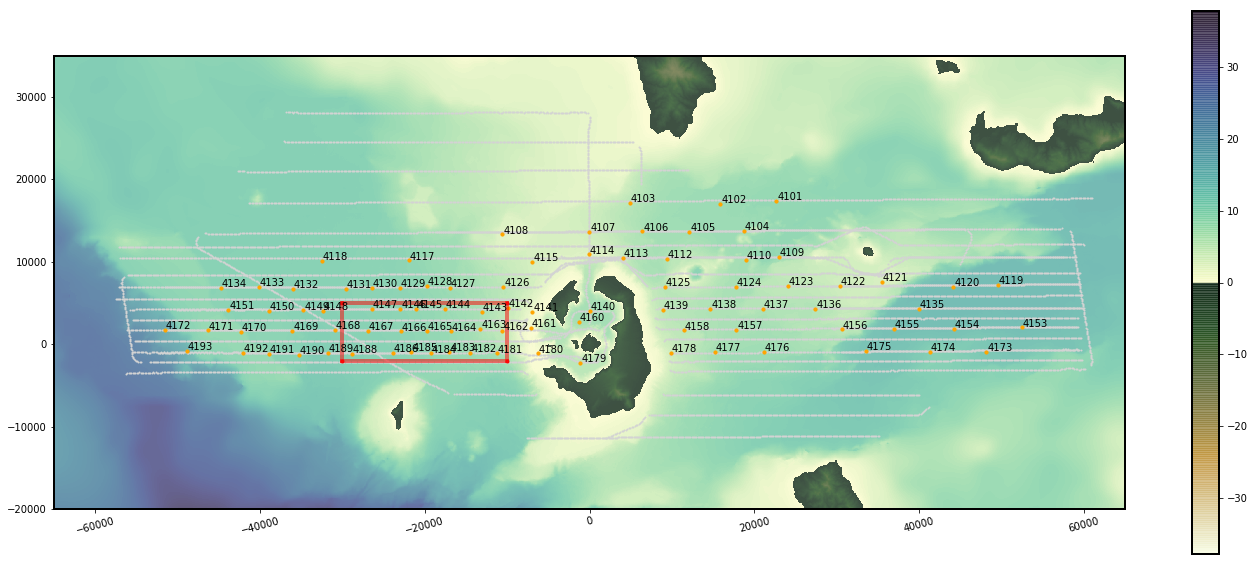

In [59]:
blocks = [
    IterationBlock(freq=3.0, niters=10, minoff=5000, maxoff=10000),
    IterationBlock(freq=4.0, niters=10, minoff=5000, maxoff=10000),
    IterationBlock(freq=5.0, niters=10, minoff=5000, maxoff=10000)
]

p11 = ProjInvSynth('p11', './p11/', timespace=timespace, blocks=blocks, 
                   io='sgy', equation='acoustic', geometry='sgy', 
                   plot=1, full_map=1, lims_pad=None)

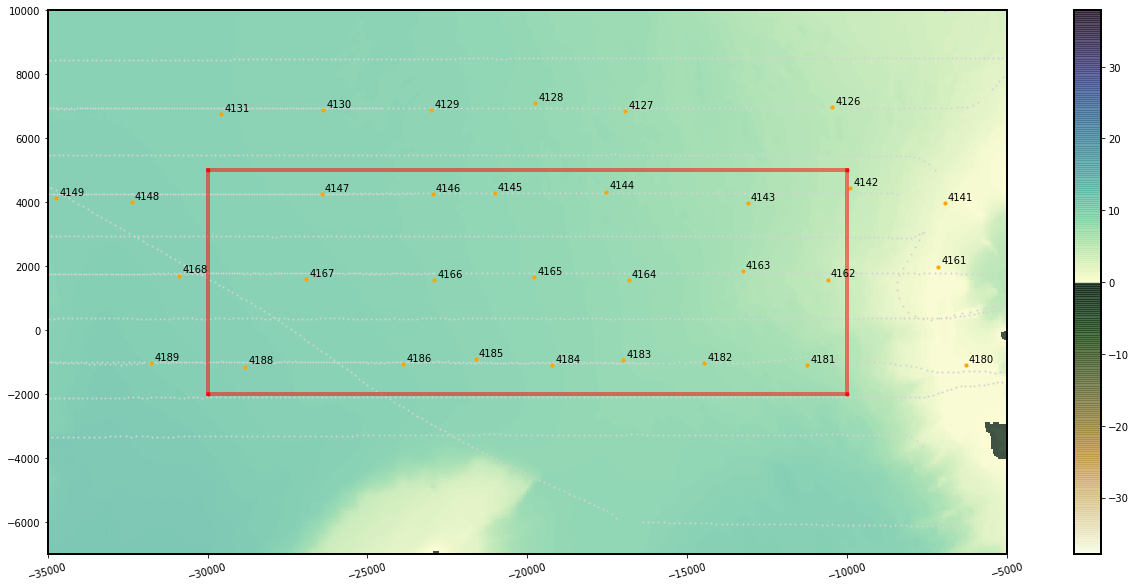

In [60]:
p11.syn.geom.plot(full_map=1)

In [7]:
p11.syn.dims

[401, 141, 61]

## Simple QC

Adding this type of features is very quick provided a good framework.

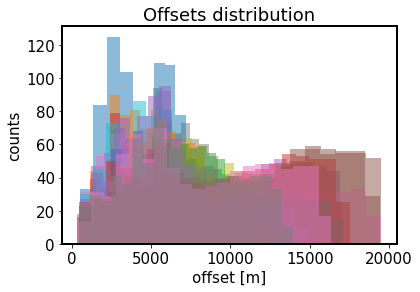

In [24]:
p11.syn.inp.sr.show_offsets()

Find the model value at the seabed. It assumes some water-column (here for vp: 1500 +/- 100 m/s) value to find where the seabed is located.

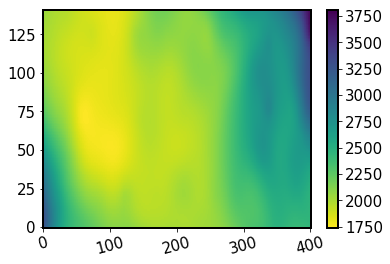

In [27]:
p11.syn.vp.true.seabed_value()

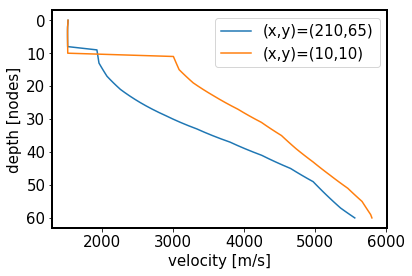

In [31]:
p11.syn.vp.true.plot_z_profile(xy_list=[[10,10], [210,65]])

## More detailed setup

In [18]:
p11.syn.env.var

{'dump_Grad': True,
 'dump_Prec': True,
 'dump_RawGrad': True,
 'dump_RawPrec': True,
 'dump_compare': False,
 'dump_dat': True,
 'dump_fw': -500,
 'sched_timestamp': True,
 'slave_timestamp': True}

In [ ]:
p11.syn.inp.sp.create()
p11.syn.inp.runfile.create(b_abs=2, e_abs=0, verbos=2)
p11.syn.inp.pbs.create(verbos=2, nnodes=1, hours=2, ncpus=12, q='general')

In [58]:
p11.syn.inp.check()

+++++++++++++++ Will only check input files and dump canonical runfile ++++++++++++++++
---=== Starting run (host: ese-kajetan) on 2019/06/17, 13:41:17 ===---
executable: fullwave3D.exe, version: unknown, release date: 2019-06-13
=== scheduler_getprojargs: Project name (command-line argument): "p11s"
=== setup_probtype: Equation: "acoustic", Anisotropy: "none", Domain: "time", Kernel: "low"
+++ ReadParms: WARNING, unknown keyword in Runfile: "ibfs"
+++ ReadParms: WARNING, unknown keyword in Runfile: "seaLevel"
+++ ReadParms: WARNING, unknown keyword in Runfile: "maxGhostIter"
+++ ReadParms: WARNING, unknown keyword in Runfile: "vacuum"
+++ ReadParms: WARNING, unknown keyword in Runfile: "accuracy"
+++ ReadParms: WARNING, unknown keyword in Runfile: "minGhostFS"
+++ ReadParms: WARNING, unknown keyword in Runfile: "minFictFS"
+++ ReadParms: WARNING, unknown keyword in Runfile: "interpMode"
+++ ReadParms: WARNING, unknown keyword in Runfile: "srcType"
+++ ReadParms: WARNING, unknown keywo

## Synthetic run

![title](p11/syn/inp/p11s-TrueVp_Anom_4165.png)

In [34]:
p11.syn.out.fw

Note a drop in wavelength when entering the water.

![title](p11/syn/out/p11s-fw-002000-csref04144-iter00001-taskid00004_m.gif)

![title](p11/syn/out/p11s-fw-000500.gif)

In [35]:
p11.syn.out.synth

![title](p11/syn/out/p11s-Synthetic.gif)

## Inversion

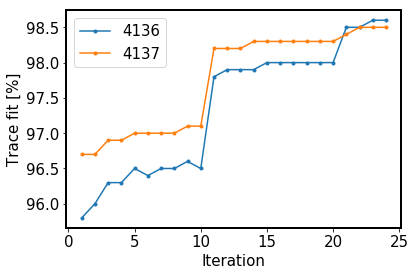

In [10]:
p07.inv.out.functional.plot()

In [ ]:
p11.inv.vp.it[22].plot()

![title](p11/inv/out/p11i-CP-Vp_Rec_4165.gif)

Raw gradient shows the actual penetration depth.

![title](p11/inv/out/p11i-CP_RawGrad_4165.gif)

Raw preconditioner corresponds to the wavefield energy. This is what gradient is divided by (equivalent to inverse Hessian operator), obviously with some stabilization.

![title](p11/inv/out/p11i-CP_RawPrec_4165.gif)

In [116]:
proj6.inp.files

{'FS': 'proj6-FreeSurf.vtr',
 'OutSeis': 'proj6-OutSeis.sgy',
 'R': 'proj6-Receivers.geo',
 'S': 'proj6-Sources.geo',
 'Sign': 'proj6-Signature.sgy',
 'SignIdx': 'proj6-Signature.idx',
 'Templ': 'proj6-Template.sgy',
 'TemplIdx': 'proj6-Template.idx',
 'TrueVp': 'proj6-TrueVp.sgy',
 'TrueVs': 'proj6-TrueVs.sgy',
 'pbs': 'proj6-Run.pbs',
 'runfile': 'proj6-Runfile.key',
 'runfile_skelet': 'proj6-Skeleton.key',
 'runfile_synth': 'proj6-Runfile_synth.key'}

# Example2

The simplest 5-point, 2D acoustic solver with reflecting boundaries.

In [ ]:
wfield, receivers = proj.run_solver(sources, receivers)

<img src="Screenshot_2019-08-07_01-31-36.png" width="300" > 

# Summary of most important features

1. In a few lines of code:
   - **create a synthetic** (simple model, Ricker wavelet etc.) **project** from scratch
   - **plot all the input and output** of any project (to files or in Jupyter)

2. Logical referencing to all project-objects: 
    - proj.inp.epsilon.start
    - proj.out.functional
    - ...

3. Control everything in Jupyter by calling class-methods with multiple keyword arguments to overwrite default values:
    - iteration blocks
    - runfile parameters (including SegyPrep, ModPrep, PBS scripts)
    - ...
4. Handle complex plots: 
    - multi-layer slices of a model, topography (or any surface), wavefield, sources - at once
    - juxtposition of synthetic and observed data (interleaving, overlaying)
    - simple signal processing: arbitrary normalization: trace ---> f(trace), FFT etc.

5. Keep the directory clean (see fig. below).

<img src="tree_struct.png" >

# For developers

1. Docstrings 
2. Autologging
3. Decorators
4. OOP

<img src="OOP.png" width="500" >

# Next steps

## Alpha version

1. Share a much-simplified code to get feedback on the general structure.
2. Redesign a structure if needed.

## Beta version

3. Fill with features (myself and hopefully other people)
 - segyio
 - phase plots
 - simple inversion
 - ...
4. Be mindful of different needs of different people (large industry datasets, medical)